In [156]:
import numpy as np
import pandas as pd
import seaborn as sns

Вариант 4. Заменить пропущенные значения в столбце y на средние по столбцу, удалить строки, которые содержат пропуски в столбце x, выявить выбросы в столбце y и заменить их интерполяцией. Построить диаграмму рассеяния с уменьшенным размером маркера, скрипичные диаграммы и диаграмму рассеяния по случайной выборке из 12 значений.

In [157]:
data = pd.read_excel('Семинар 4.xlsx', sheet_name = '4' , names = ['num', 'x', 'y']).drop('num', axis = 1)
data

,x,y
0,-0.791690,-0.575642
1,2.921940,4.685119
2,-2.489532,-5.565769
3,-6.712690,-5.104635
4,1.013748,0.918003
...,...,...
995,8.669564,7.318577
996,-4.069420,-5.371781
997,8.091316,10.644122
998,8.150652,6.855598


In [158]:
data['y'] = data['y'].fillna(data['y'].mean())
data = data.dropna(subset=['x'])
data

,x,y
0,-0.791690,-0.575642
1,2.921940,4.685119
2,-2.489532,-5.565769
3,-6.712690,-5.104635
4,1.013748,0.918003
...,...,...
995,8.669564,7.318577
996,-4.069420,-5.371781
997,8.091316,10.644122
998,8.150652,6.855598


In [159]:
# Вычисление межквартильного расстояния и границ для столбца 'y'
q_025_y = np.quantile(data['y'], 0.25)
q_075_y = np.quantile(data['y'], 0.75)
idq_y = q_075_y - q_025_y
upper_bound_y = q_075_y + 1.5 * idq_y
lower_bound_y = q_025_y - 1.5 * idq_y

# Вывод результатов
print('Первая квартиль (y) =', q_025_y)
print('Третья квартиль (y) =', q_075_y)
print('Межквартильное расстояние (y) =', idq_y)
print('Верхняя граница (y) =', upper_bound_y)
print('Нижняя граница (y) =', lower_bound_y, "\n")

# Замена выбросов в столбце 'y' интерполяцией
for i in data.index:
    if (data.loc[i, 'y'] > upper_bound_y) | (data.loc[i, 'y'] < lower_bound_y):
        print(f"Строка {i}: {data.loc[i, 'y']} изменено на {np.interp(data.loc[i, 'y'], (data['y'].min(), data['y'].max()), (q_025_y, q_075_y))}")
        data.loc[i, 'y'] = np.interp(data.loc[i, 'y'], (data['y'].min(), data['y'].max()), (q_025_y, q_075_y))

Первая квартиль (y) = -2.811530055763601
Третья квартиль (y) = 2.8841772958843306
Межквартильное расстояние (y) = 5.695707351647932
Верхняя граница (y) = 11.427738323356227
Нижняя граница (y) = -11.355091083235498 

Строка 66: 24.52551447043054 изменено на 2.001634749819896
Строка 197: -15.29471974483068 изменено на 1.1978624961214361
Строка 210: -12.193882085363 изменено на 1.2604529686040955
Строка 261: 28.52693824522737 изменено на 2.082403571722968
Строка 319: -164.2839486679641 изменено на -1.8094881804460807
Строка 429: 14.58811253677049 изменено на 1.8010480856393984
Строка 452: 11.92749811253495 изменено на 1.747343528292248
Строка 499: -138.5002825428231 изменено на -1.2890443448327125
Строка 510: 12.28214172570916 изменено на 1.7545020169811858
Строка 563: -20.5832255213847 изменено на 1.0911138973126162
Строка 603: 12.9376005108347 изменено на 1.7677324661563167
Строка 619: -58.69646750034187 изменено на 0.321797317315192
Строка 666: -11.6541941629666 изменено на 1.271346580

Диаграмма рассеяния с уменьшенным размером маркера (5)

<Axes: xlabel='x', ylabel='y'>

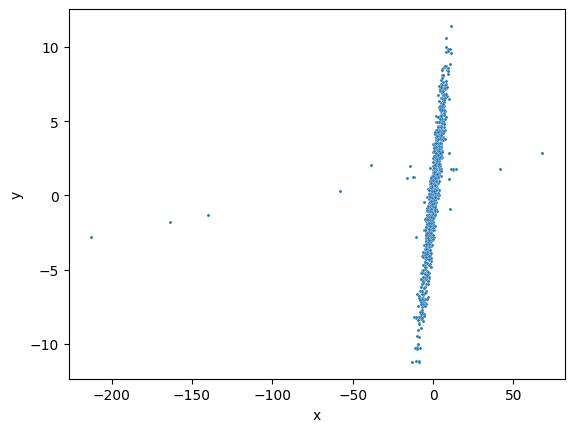

In [160]:
sns.scatterplot(x = data['x'], y = data['y'], s = 5)

Скрипичные диаграммы

<Axes: ylabel='x'>

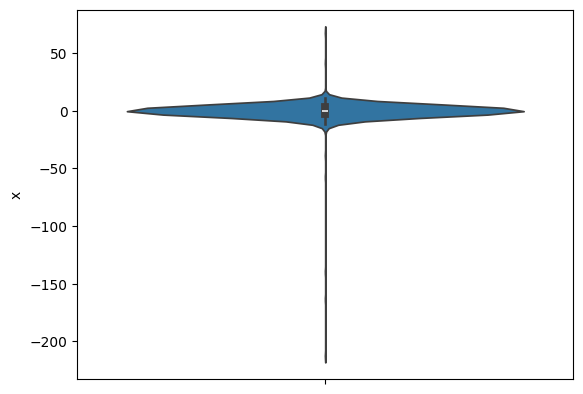

In [161]:
sns.violinplot(y = data['x'], data = data)

<Axes: ylabel='y'>

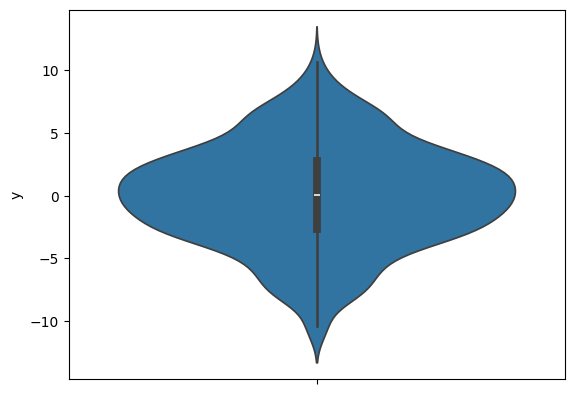

In [162]:
sns.violinplot(y = data['y'], data = data)

Диаграмма рассеяния по случайной выборке из 12 значений

<Axes: xlabel='x', ylabel='y'>

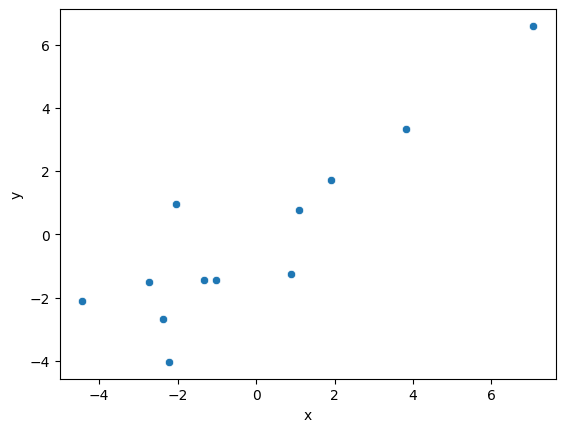

In [163]:
np.random.seed(42)
random_sample = data.sample(12)
sns.scatterplot(x = random_sample['x'], y = random_sample['y'])